In [1]:
##############################################################################################################
# DESCRIPTION: 
# RESULTS:     
#              
##############################################################################################################

In [2]:
######################
# CONFIG & HYPERPARAMS
######################

import os

class HyperParams:
    pass

IMG_PATH = "C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/"

IMG_PATH_VALID = IMG_PATH + "validation/"
IMG_PATH_TEST = IMG_PATH + "test/"
IMG_PATH_TRAIN = IMG_PATH

hyperparams = HyperParams()
hyperparams.IMG_WIDTH = 64
hyperparams.IMG_HEIGHT = 64
hyperparams.EPOCHS = 320
hyperparams.BATCH_SIZE = 32

hyperparams.LOSS = 'mean_absolute_error'

IMG_WIDTH = hyperparams.IMG_WIDTH
IMG_HEIGHT = hyperparams.IMG_HEIGHT

IMG_CASE = str(IMG_WIDTH) +  "/0100_1000"
MODEL_NAME = "0100_1000-64-convsim-xxc3-4"

DEST_TESTS = os.path.abspath(os.path.join('../../../out_tests/', MODEL_NAME))

class RadianceLimits:
    pass
radiance_limits = RadianceLimits()
radiance_limits.noisy_min = 0
radiance_limits.noisy_max = 0.0898 
radiance_limits.nitid_min = 0
radiance_limits.nitid_max = 0.3248 

from tensorflow.keras.optimizers import RMSprop
hyperparams.OPTIMIZER = RMSprop(learning_rate=0.0005)

In [3]:
##################
# IMPORTS
##################

import tensorflow as tf
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.compat.v1.Session(config=config)

import numpy as np
import tensorflow 
from numpy.random import seed
seed(1)
tensorflow.random.set_seed(2)
import os, sys
module_path = os.path.abspath(os.path.join('../../support/'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import DatasetUtilsTifF as dsutils
import TrainModelD as train
import ReportsK as reports
import ConvSimG as model_factory

In [4]:
##################
# MODEL DEFINITION
##################
model = model_factory.buildModel(hyperparams)
model.summary()
model.optimizer.get_config()
model.optimizer.get_config()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 64, 64, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 32, 32, 32)   544         input_1[0][0]                    
__________________________________________________________________________________________________
activation_4 (Activation)       (None, 32, 32, 32)   0           conv2d_2[0][0]                   
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 16, 16, 16)   8208        activation_4[0][0]               
______________________________________________________________________________________________

{'name': 'RMSprop',
 'learning_rate': 0.0005,
 'decay': 0.0,
 'rho': 0.9,
 'momentum': 0.0,
 'epsilon': 1e-07,
 'centered': False}

In [5]:
os.makedirs(os.path.abspath(os.path.join('../../../saves/', MODEL_NAME + "_checkpoints")), exist_ok=False)

In [6]:
##################
# PREPARE DATA
##################

train_noisy_files, train_nitid_files, train_noisy, train_nitid = \
        dsutils.readDataset( IMG_PATH_TRAIN, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT, radiance_limits)

val_noisy_files, val_nitid_files, val_noisy, val_nitid = \
        dsutils.readDataset( IMG_PATH_VALID, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT, radiance_limits)

train_noisy, train_nitid = dsutils.reshapeDataset( train_noisy, train_nitid, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT )
val_noisy, val_nitid = dsutils.reshapeDataset( val_noisy, val_nitid, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT )

Read dataset. Path: C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/
Noisy files:8738
Nitid files:8738
Read dataset. Path: C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/validation/
Noisy files:2208
Nitid files:2208


In [7]:
##################
# TRAIN MODEL
##################
import tensorflow as tf
from tensorflow.compat.v1.keras.backend import set_session
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True  # dynamically grow the memory used on the GPU
config.log_device_placement = True  # to log device placement (on which device the operation ran)
sess = tf.compat.v1.Session(config=config)
set_session(sess)
            
checkpoint_filepath = os.path.abspath(os.path.join('../../../saves/') + MODEL_NAME + "_checkpoint_THREE_" + '_weights_{epoch:02d}-{val_loss:.2f}')

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_loss',
    mode='min',
    save_best_only=True)

hist = train.fit( model, hyperparams, train_noisy, train_nitid, val_noisy, val_nitid, patience=80, \
                 callbacks=[model_checkpoint_callback] )

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: NVIDIA GeForce RTX 3070 Ti, pci bus id: 0000:2b:00.0, compute capability: 8.6

Epoch 1/320
274/274 [==============================] - 9s 10ms/step - loss: 0.0410 - val_loss: 0.0263
INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0100_1000-64-convsim-xxc3-4_checkpoint_THREE__weights_01-0.03\assets
Epoch 2/320
  5/274 [..............................] - ETA: 7s - loss: 0.0321

C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


274/274 [==============================] - 3s 10ms/step - loss: 0.0297 - val_loss: 0.0308
Epoch 3/320
274/274 [==============================] - 3s 9ms/step - loss: 0.0285 - val_loss: 0.0230
INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0100_1000-64-convsim-xxc3-4_checkpoint_THREE__weights_03-0.02\assets
Epoch 4/320
 11/274 [>.............................] - ETA: 4s - loss: 0.0279

C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


274/274 [==============================] - 3s 11ms/step - loss: 0.0276 - val_loss: 0.0353
Epoch 5/320
274/274 [==============================] - 3s 9ms/step - loss: 0.0273 - val_loss: 0.0221
INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0100_1000-64-convsim-xxc3-4_checkpoint_THREE__weights_05-0.02\assets
Epoch 6/320
  9/274 [..............................] - ETA: 4s - loss: 0.0278

C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


274/274 [==============================] - 3s 11ms/step - loss: 0.0268 - val_loss: 0.0330
Epoch 7/320
274/274 [==============================] - 2s 9ms/step - loss: 0.0265 - val_loss: 0.0296
Epoch 8/320
274/274 [==============================] - 2s 9ms/step - loss: 0.0263 - val_loss: 0.0305
Epoch 9/320
274/274 [==============================] - 3s 9ms/step - loss: 0.0260 - val_loss: 0.0251
Epoch 10/320
274/274 [==============================] - 2s 9ms/step - loss: 0.0257 - val_loss: 0.0300
Epoch 11/320
274/274 [==============================] - 3s 9ms/step - loss: 0.0256 - val_loss: 0.0266
Epoch 12/320
274/274 [==============================] - 2s 9ms/step - loss: 0.0254 - val_loss: 0.0264
Epoch 13/320
274/274 [==============================] - 2s 9ms/step - loss: 0.0252 - val_loss: 0.0248
Epoch 14/320
274/274 [==============================] - 2s 9ms/step - loss: 0.0251 - val_loss: 0.0259
Epoch 15/320
274/274 [==============================] - 2s 9ms/step - loss: 0.0250 - val_loss: 0.

C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


274/274 [==============================] - 3s 11ms/step - loss: 0.0245 - val_loss: 0.0359
Epoch 21/320
274/274 [==============================] - 3s 9ms/step - loss: 0.0244 - val_loss: 0.0214
INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0100_1000-64-convsim-xxc3-4_checkpoint_THREE__weights_21-0.02\assets
Epoch 22/320
  7/274 [..............................] - ETA: 5s - loss: 0.0236

C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


274/274 [==============================] - 3s 11ms/step - loss: 0.0244 - val_loss: 0.0327
Epoch 23/320
274/274 [==============================] - 2s 9ms/step - loss: 0.0243 - val_loss: 0.0334
Epoch 24/320
274/274 [==============================] - 2s 9ms/step - loss: 0.0241 - val_loss: 0.0290
Epoch 25/320
274/274 [==============================] - 2s 9ms/step - loss: 0.0242 - val_loss: 0.0218
Epoch 26/320
274/274 [==============================] - 3s 9ms/step - loss: 0.0240 - val_loss: 0.0212
INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0100_1000-64-convsim-xxc3-4_checkpoint_THREE__weights_26-0.02\assets
Epoch 27/320
  5/274 [..............................] - ETA: 6s - loss: 0.0225

C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


274/274 [==============================] - 3s 11ms/step - loss: 0.0240 - val_loss: 0.0282
Epoch 28/320
274/274 [==============================] - 2s 9ms/step - loss: 0.0240 - val_loss: 0.0213
Epoch 29/320
274/274 [==============================] - 2s 9ms/step - loss: 0.0239 - val_loss: 0.0285
Epoch 30/320
274/274 [==============================] - 2s 9ms/step - loss: 0.0238 - val_loss: 0.0293
Epoch 31/320
274/274 [==============================] - 2s 9ms/step - loss: 0.0237 - val_loss: 0.0208
INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0100_1000-64-convsim-xxc3-4_checkpoint_THREE__weights_31-0.02\assets
Epoch 32/320
 12/274 [>.............................] - ETA: 4s - loss: 0.0233

C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


274/274 [==============================] - 3s 10ms/step - loss: 0.0236 - val_loss: 0.0235
Epoch 33/320
274/274 [==============================] - 2s 9ms/step - loss: 0.0237 - val_loss: 0.0210
Epoch 34/320
274/274 [==============================] - 3s 9ms/step - loss: 0.0235 - val_loss: 0.0224
Epoch 35/320
274/274 [==============================] - 2s 9ms/step - loss: 0.0235 - val_loss: 0.0289
Epoch 36/320
274/274 [==============================] - 2s 9ms/step - loss: 0.0235 - val_loss: 0.0204
INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0100_1000-64-convsim-xxc3-4_checkpoint_THREE__weights_36-0.02\assets
Epoch 37/320
  7/274 [..............................] - ETA: 5s - loss: 0.0235

C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


274/274 [==============================] - 3s 11ms/step - loss: 0.0235 - val_loss: 0.0285
Epoch 38/320
274/274 [==============================] - 2s 9ms/step - loss: 0.0234 - val_loss: 0.0212
Epoch 39/320
274/274 [==============================] - 2s 9ms/step - loss: 0.0234 - val_loss: 0.0216
Epoch 40/320
274/274 [==============================] - 2s 9ms/step - loss: 0.0234 - val_loss: 0.0266
Epoch 41/320
274/274 [==============================] - 3s 9ms/step - loss: 0.0233 - val_loss: 0.0219
Epoch 42/320
274/274 [==============================] - 2s 9ms/step - loss: 0.0233 - val_loss: 0.0259
Epoch 43/320
274/274 [==============================] - 2s 9ms/step - loss: 0.0232 - val_loss: 0.0242
Epoch 44/320
274/274 [==============================] - 2s 9ms/step - loss: 0.0232 - val_loss: 0.0252
Epoch 45/320
274/274 [==============================] - 3s 9ms/step - loss: 0.0232 - val_loss: 0.0263
Epoch 46/320
274/274 [==============================] - 2s 9ms/step - loss: 0.0230 - val_loss:

C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


274/274 [==============================] - 3s 11ms/step - loss: 0.0221 - val_loss: 0.0259
Epoch 85/320
274/274 [==============================] - 3s 9ms/step - loss: 0.0222 - val_loss: 0.0202
INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0100_1000-64-convsim-xxc3-4_checkpoint_THREE__weights_85-0.02\assets
Epoch 86/320
  7/274 [..............................] - ETA: 6s - loss: 0.0201

C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


274/274 [==============================] - 3s 9ms/step - loss: 0.0220 - val_loss: 0.0228
Epoch 87/320
274/274 [==============================] - 3s 9ms/step - loss: 0.0220 - val_loss: 0.0222
Epoch 88/320
274/274 [==============================] - 2s 9ms/step - loss: 0.0220 - val_loss: 0.0249
Epoch 89/320
274/274 [==============================] - 2s 9ms/step - loss: 0.0220 - val_loss: 0.0216
Epoch 90/320
274/274 [==============================] - 3s 9ms/step - loss: 0.0220 - val_loss: 0.0215
Epoch 91/320
274/274 [==============================] - 3s 9ms/step - loss: 0.0219 - val_loss: 0.0273
Epoch 92/320
274/274 [==============================] - 2s 9ms/step - loss: 0.0220 - val_loss: 0.0213
Epoch 93/320
274/274 [==============================] - 3s 9ms/step - loss: 0.0219 - val_loss: 0.0212
Epoch 94/320
274/274 [==============================] - 2s 9ms/step - loss: 0.0218 - val_loss: 0.0200
INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0100_1000-64-convsim-xxc3-4_c

C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


274/274 [==============================] - 3s 11ms/step - loss: 0.0218 - val_loss: 0.0232
Epoch 96/320
274/274 [==============================] - 2s 9ms/step - loss: 0.0218 - val_loss: 0.0203
Epoch 97/320
274/274 [==============================] - 2s 9ms/step - loss: 0.0219 - val_loss: 0.0245
Epoch 98/320
274/274 [==============================] - 3s 9ms/step - loss: 0.0218 - val_loss: 0.0228
Epoch 99/320
274/274 [==============================] - 2s 9ms/step - loss: 0.0217 - val_loss: 0.0285
Epoch 100/320
274/274 [==============================] - 2s 9ms/step - loss: 0.0218 - val_loss: 0.0204
Epoch 101/320
274/274 [==============================] - 3s 9ms/step - loss: 0.0218 - val_loss: 0.0241
Epoch 102/320
274/274 [==============================] - 2s 9ms/step - loss: 0.0217 - val_loss: 0.0255
Epoch 103/320
274/274 [==============================] - 2s 9ms/step - loss: 0.0216 - val_loss: 0.0245
Epoch 104/320
274/274 [==============================] - 3s 9ms/step - loss: 0.0216 - val_

274/274 [==============================] - 3s 9ms/step - loss: 0.0204 - val_loss: 0.0213
Restoring model weights from the end of the best epoch.
Epoch 00174: early stopping
Train size:8738
Valid.size:2208
--- 473.1116042137146 seconds ---


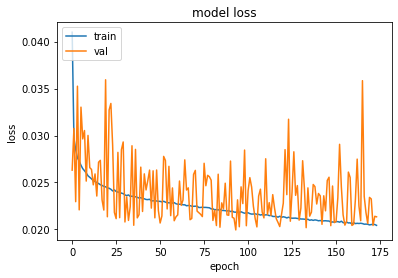

Best Epoch:94


In [8]:
##################
# REPORTS
##################
reports.plotHistory( hist )

In [9]:
best_epochs = np.argmin(hist.history['val_loss']) + 1
print(best_epochs)

94


In [10]:
model.save(os.path.abspath(os.path.join('../../../saves/', MODEL_NAME)), model)

INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0100_1000-64-convsim-xxc3-4\assets


C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [11]:
##################
# PREDICTIONS
##################
ACCURACY_THRESHOLD = 0.01
predictions_metrics, predictions_headers \
    = reports.calcPredictionMetrics( model, val_noisy, val_nitid, ACCURACY_THRESHOLD, \
                                    save_pred = True, save_path = DEST_TESTS, \
                                    noisy_files = val_noisy_files, nitid_files = val_nitid_files, \
                                    max_nitid= radiance_limits.nitid_max  )

Black image found
Black image found
Images count =2208
Best RMSENZ  =2008 (0.91)
Best MAENZ   =2008 (0.91)
Best PSNR    =2008 (0.91)
Best Accuracy=1960 (0.89)
RMSE-NZ  Pred=0.0245  Noisy=0.0943
MAE-NZ   Pred=0.0205  Noisy=0.0903
PSNR     Pred=20.0 dB Noisy=9.4 dB
Accuracy Pred=0.39    Noisy=0.09
SSM      Pred=0.94    Noisy=0.63
HOG MSE  Pred=0.09    Noisy=0.12


In [12]:
reports.saveMetrics( DEST_TESTS, MODEL_NAME, predictions_headers, predictions_metrics )

Read dataset. Path: C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test/
Noisy files:19
Nitid files:19
Index:0
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0112_00_02_12_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0112_00_02_12_nitid_idx134.tif


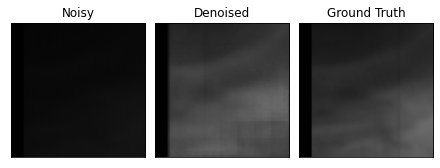

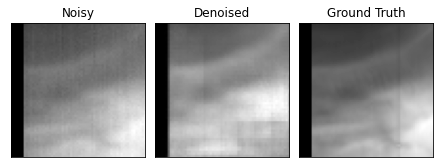

RMSE-NZ  Pred=0.0651  Noisy=0.1722 BEST
MAE-NZ   Pred=0.0605  Noisy=0.1588 BEST
PSNR     Pred=16.1 dB Noisy=7.7 dB BEST
Accuracy Pred=0.08    Noisy=0.00 BEST
SSM      Pred=0.89    Noisy=0.30
HOG MSE  Pred=0.03    Noisy=0.04
******************************************************
Index:1
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0112_00_02_13_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0112_00_02_13_nitid_idx134.tif


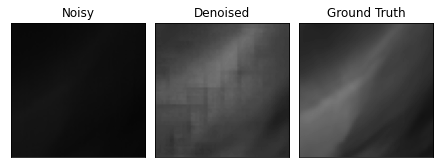

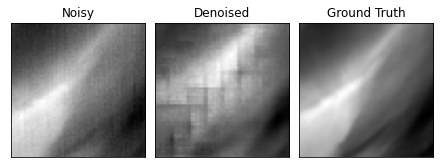

RMSE-NZ  Pred=0.0725  Noisy=0.2105 BEST
MAE-NZ   Pred=0.0660  Noisy=0.1954 BEST
PSNR     Pred=16.2 dB Noisy=6.9 dB BEST
Accuracy Pred=0.02    Noisy=0.00 BEST
SSM      Pred=0.84    Noisy=0.32
HOG MSE  Pred=0.09    Noisy=0.13
******************************************************
Index:2
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0112_00_02_14_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0112_00_02_14_nitid_idx134.tif


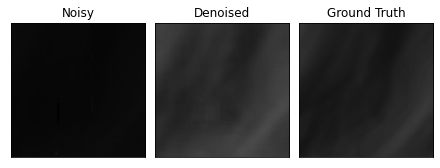

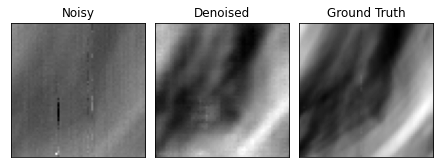

RMSE-NZ  Pred=0.0642  Noisy=0.0994 BEST
MAE-NZ   Pred=0.0631  Noisy=0.0953 BEST
PSNR     Pred=10.8 dB Noisy=7.0 dB BEST
Accuracy Pred=0.00    Noisy=0.00 WORST
SSM      Pred=0.90    Noisy=0.31
HOG MSE  Pred=0.05    Noisy=0.16
******************************************************
Index:3
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0112_01_00_0_noisy_idx014.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0112_01_00_0_nitid_idx017.tif


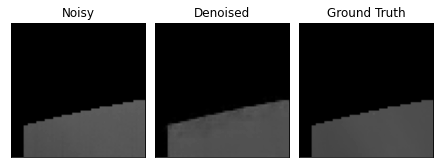

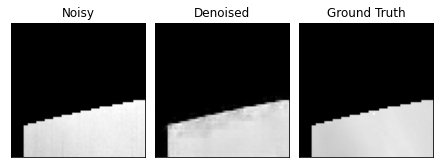

RMSE-NZ  Pred=0.0183  Noisy=0.0388 BEST
MAE-NZ   Pred=0.0100  Noisy=0.0376 BEST
PSNR     Pred=25.5 dB Noisy=19.0 dB BEST
Accuracy Pred=0.65    Noisy=0.00 BEST
SSM      Pred=0.97    Noisy=0.97
HOG MSE  Pred=0.14    Noisy=0.07
******************************************************
Index:4
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0317_03_01_4_noisy_idx020.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0317_03_01_4_nitid_idx017.tif


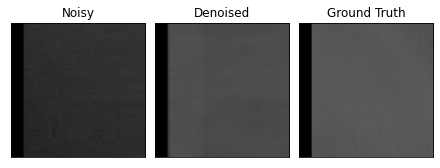

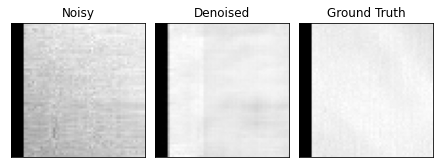

RMSE-NZ  Pred=0.0450  Noisy=0.1632 BEST
MAE-NZ   Pred=0.0419  Noisy=0.1622 BEST
PSNR     Pred=18.1 dB Noisy=6.9 dB BEST
Accuracy Pred=0.05    Noisy=0.00 BEST
SSM      Pred=0.95    Noisy=0.83
HOG MSE  Pred=0.01    Noisy=0.01
******************************************************
Index:5
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0317_03_02_12_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0317_03_02_12_nitid_idx134.tif


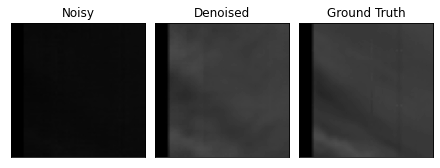

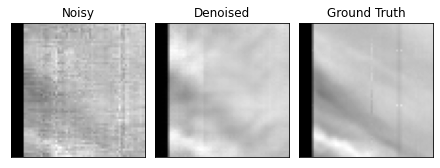

RMSE-NZ  Pred=0.0118  Noisy=0.1870 BEST
MAE-NZ   Pred=0.0091  Noisy=0.1854 BEST
PSNR     Pred=28.1 dB Noisy=4.2 dB BEST
Accuracy Pred=0.63    Noisy=0.00 BEST
SSM      Pred=0.97    Noisy=0.29
HOG MSE  Pred=0.04    Noisy=0.03
******************************************************
Index:6
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0318_03_02_4_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0318_03_02_4_nitid_idx134.tif


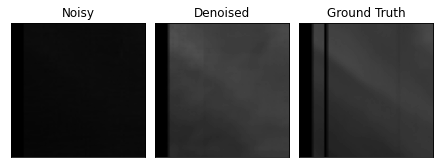

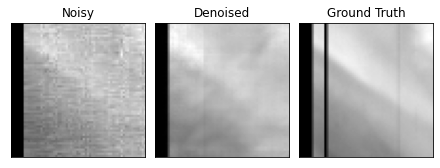

RMSE-NZ  Pred=0.0379  Noisy=0.1704 BEST
MAE-NZ   Pred=0.0213  Noisy=0.1661 BEST
PSNR     Pred=17.6 dB Noisy=4.6 dB BEST
Accuracy Pred=0.30    Noisy=0.00 BEST
SSM      Pred=0.88    Noisy=0.30
HOG MSE  Pred=0.05    Noisy=0.07
******************************************************
Index:7
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0318_03_02_5_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0318_03_02_5_nitid_idx134.tif


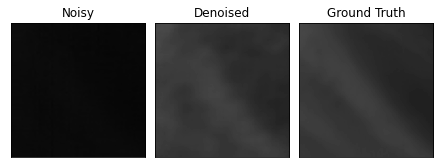

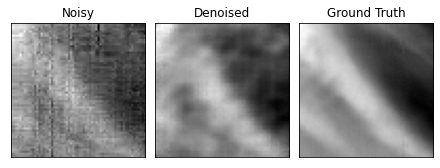

RMSE-NZ  Pred=0.0145  Noisy=0.1649 BEST
MAE-NZ   Pred=0.0121  Noisy=0.1619 BEST
PSNR     Pred=25.7 dB Noisy=4.6 dB BEST
Accuracy Pred=0.43    Noisy=0.00 BEST
SSM      Pred=0.97    Noisy=0.33
HOG MSE  Pred=0.15    Noisy=0.35
******************************************************
Index:8
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0322_03_02_10_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0322_03_02_10_nitid_idx134.tif


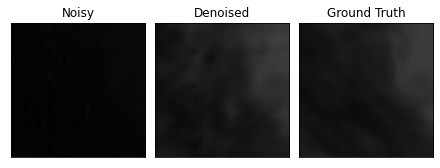

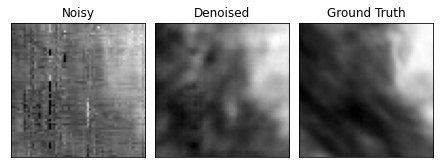

RMSE-NZ  Pred=0.0159  Noisy=0.0964 BEST
MAE-NZ   Pred=0.0121  Noisy=0.0856 BEST
PSNR     Pred=23.5 dB Noisy=7.9 dB BEST
Accuracy Pred=0.52    Noisy=0.00 BEST
SSM      Pred=0.94    Noisy=0.35
HOG MSE  Pred=0.07    Noisy=0.20
******************************************************
Index:9
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0322_04_03_14_noisy_idx157.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0322_04_03_14_nitid_idx146.tif


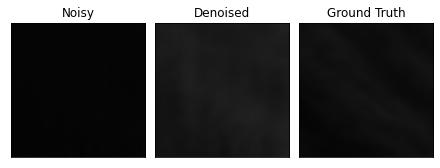

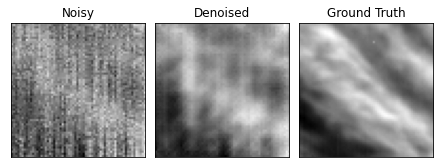

RMSE-NZ  Pred=0.0449  Noisy=0.0368 WORST
MAE-NZ   Pred=0.0441  Noisy=0.0345 WORST
PSNR     Pred=5.6 dB Noisy=7.3 dB WORST
Accuracy Pred=0.00    Noisy=0.05 WORST
SSM      Pred=0.81    Noisy=0.40
HOG MSE  Pred=0.17    Noisy=0.22
******************************************************
Index:10
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0332_00_01_12_noisy_idx020.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0332_00_01_12_nitid_idx017.tif


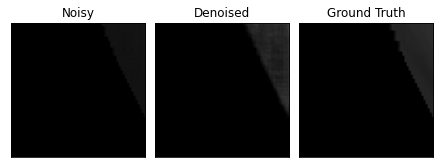

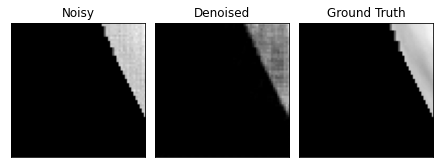

RMSE-NZ  Pred=0.0136  Noisy=0.0366 BEST
MAE-NZ   Pred=0.0050  Noisy=0.0184 BEST
PSNR     Pred=22.6 dB Noisy=14.0 dB BEST
Accuracy Pred=0.85    Noisy=0.74 BEST
SSM      Pred=0.97    Noisy=0.93
HOG MSE  Pred=0.10    Noisy=0.02
******************************************************
Index:11
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0332_00_02_5_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0332_00_02_5_nitid_idx134.tif


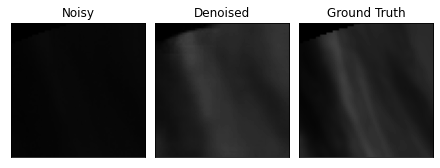

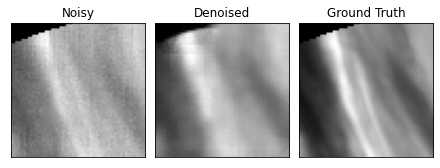

RMSE-NZ  Pred=0.0272  Noisy=0.1089 BEST
MAE-NZ   Pred=0.0242  Noisy=0.0979 BEST
PSNR     Pred=19.4 dB Noisy=7.3 dB BEST
Accuracy Pred=0.14    Noisy=0.01 BEST
SSM      Pred=0.90    Noisy=0.33
HOG MSE  Pred=0.04    Noisy=0.13
******************************************************
Index:12
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0343_03_01_8_noisy_idx020.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0343_03_01_8_nitid_idx017.tif


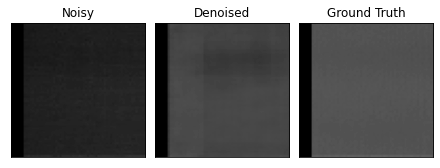

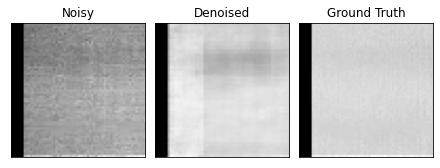

RMSE-NZ  Pred=0.0583  Noisy=0.1952 BEST
MAE-NZ   Pred=0.0534  Noisy=0.1947 BEST
PSNR     Pred=16.5 dB Noisy=6.0 dB BEST
Accuracy Pred=0.07    Noisy=0.00 BEST
SSM      Pred=0.93    Noisy=0.72
HOG MSE  Pred=0.01    Noisy=0.02
******************************************************
Index:13
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0379_01_02_11_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0379_01_02_11_nitid_idx134.tif


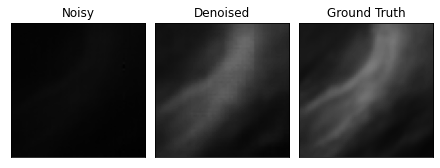

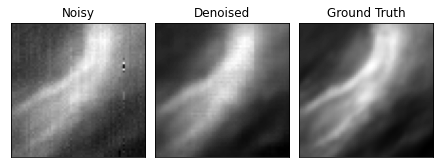

RMSE-NZ  Pred=0.0335  Noisy=0.1931 BEST
MAE-NZ   Pred=0.0270  Noisy=0.1660 BEST
PSNR     Pred=23.2 dB Noisy=8.0 dB BEST
Accuracy Pred=0.20    Noisy=0.00 BEST
SSM      Pred=0.93    Noisy=0.30
HOG MSE  Pred=0.02    Noisy=0.09
******************************************************
Index:14
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0379_01_02_12_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0379_01_02_12_nitid_idx134.tif


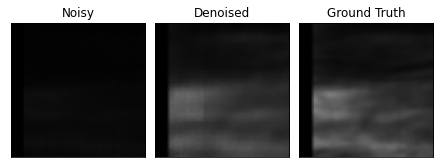

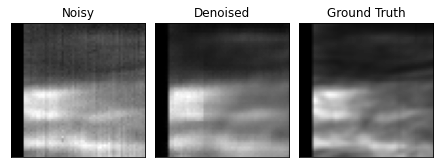

RMSE-NZ  Pred=0.0255  Noisy=0.1742 BEST
MAE-NZ   Pred=0.0173  Noisy=0.1438 BEST
PSNR     Pred=25.8 dB Noisy=9.1 dB BEST
Accuracy Pred=0.47    Noisy=0.00 BEST
SSM      Pred=0.94    Noisy=0.35
HOG MSE  Pred=0.02    Noisy=0.05
******************************************************
Index:15
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0379_01_02_13_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0379_01_02_13_nitid_idx134.tif


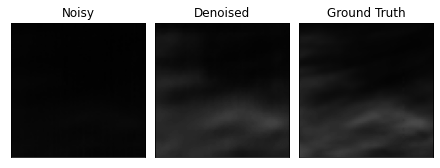

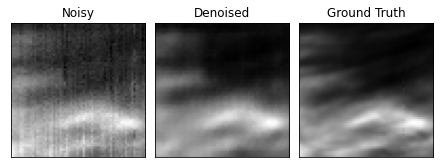

RMSE-NZ  Pred=0.0133  Noisy=0.0979 BEST
MAE-NZ   Pred=0.0097  Noisy=0.0772 BEST
PSNR     Pred=26.7 dB Noisy=9.4 dB BEST
Accuracy Pred=0.65    Noisy=0.04 BEST
SSM      Pred=0.96    Noisy=0.47
HOG MSE  Pred=0.04    Noisy=0.12
******************************************************
Index:16
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0379_01_03_11_noisy_idx157.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0379_01_03_11_nitid_idx146.tif


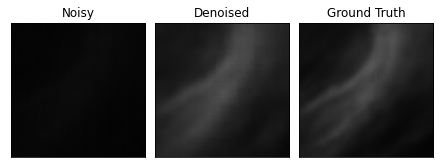

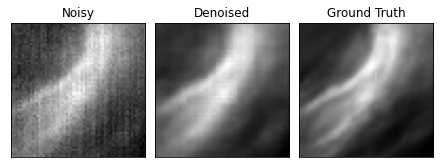

RMSE-NZ  Pred=0.0264  Noisy=0.1221 BEST
MAE-NZ   Pred=0.0233  Noisy=0.1019 BEST
PSNR     Pred=22.1 dB Noisy=8.8 dB BEST
Accuracy Pred=0.16    Noisy=0.02 BEST
SSM      Pred=0.92    Noisy=0.33
HOG MSE  Pred=0.02    Noisy=0.14
******************************************************
Index:17
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0379_01_03_8_noisy_idx157.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0379_01_03_8_nitid_idx146.tif


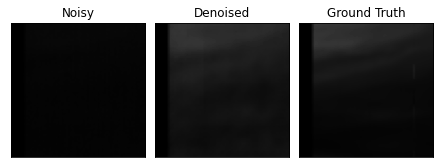

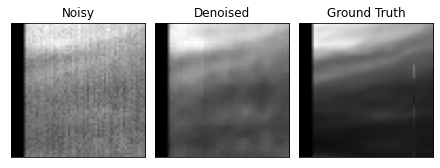

RMSE-NZ  Pred=0.0279  Noisy=0.0710 BEST
MAE-NZ   Pred=0.0249  Noisy=0.0512 BEST
PSNR     Pred=18.1 dB Noisy=10.0 dB BEST
Accuracy Pred=0.16    Noisy=0.21 WORST
SSM      Pred=0.84    Noisy=0.41
HOG MSE  Pred=0.08    Noisy=0.10
******************************************************
Index:18
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0379_05_02_0_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0379_05_02_0_nitid_idx134.tif


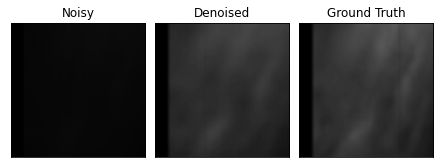

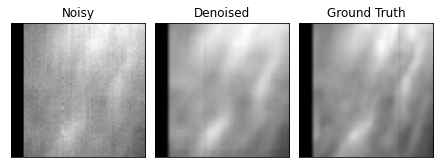

RMSE-NZ  Pred=0.0288  Noisy=0.1835 BEST
MAE-NZ   Pred=0.0250  Noisy=0.1780 BEST
PSNR     Pred=21.5 dB Noisy=5.5 dB BEST
Accuracy Pred=0.15    Noisy=0.00 BEST
SSM      Pred=0.95    Noisy=0.30
HOG MSE  Pred=0.02    Noisy=0.03
******************************************************


In [13]:
test_noisy_files, test_nitid_files, test_noisy, test_nitid = \
    dsutils.readDataset( IMG_PATH_TEST, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT, radiance_limits)

test_noisy, test_nitid = \
    dsutils.reshapeDataset( test_noisy, test_nitid,  hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT )

test_indexes = np.arange(0,test_noisy.shape[0])

reports.predictByIndexes( model, test_noisy, test_nitid, test_noisy_files, test_nitid_files, test_indexes, ACCURACY_THRESHOLD )